In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import seaborn as sns

In [3]:

df = pd.read_csv("D:\Machine Learnimg\House Price Prediction\House Price India.csv")
print(df.head())

           id   Date  number of bedrooms  number of bathrooms  living area  \
0  6762810145  42491                   5                 2.50         3650   
1  6762810635  42491                   4                 2.50         2920   
2  6762810998  42491                   5                 2.75         2910   
3  6762812605  42491                   4                 2.50         3310   
4  6762812919  42491                   3                 2.00         2710   

   lot area  number of floors  waterfront present  number of views  \
0      9050               2.0                   0                4   
1      4000               1.5                   0                0   
2      9480               1.5                   0                0   
3     42998               2.0                   0                0   
4      4500               1.5                   0                0   

   condition of the house  ...  Built Year  Renovation Year  Postal Code  \
0                       5  ...    

In [5]:
print(df.shape)
print(df.columns)

(14620, 23)
Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

In [7]:
df.describe()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,...,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04
mean,6.762821e+09,42604.538646,3.379343,2.129583,2098.262996,1.509328e+04,1.502360,0.007661,0.233105,3.430506,...,1970.926402,90.924008,122033.062244,52.792848,-114.404007,1996.702257,12753.500068,2.012244,64.950958,5.389322e+05
std,6.237575e+03,67.347991,0.938719,0.769934,928.275721,3.791962e+04,0.540239,0.087193,0.766259,0.664151,...,29.493625,416.216661,19.082418,0.137522,0.141326,691.093366,26058.414467,0.817284,8.936008,3.675324e+05
min,6.762810e+09,42491.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,6.762815e+09,42546.000000,3.000000,1.750000,1440.000000,5.010750e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.750000,1.000000,57.000000,3.200000e+05
50%,6.762821e+09,42600.000000,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,6.762826e+09,42662.000000,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,6.762832e+09,42734.000000,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06


In [8]:
df.isnull().sum()

id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int6

In [9]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.columns

Index(['id', 'date', 'number_of_bedrooms', 'number_of_bathrooms',
       'living_area', 'lot_area', 'number_of_floors', 'waterfront_present',
       'number_of_views', 'condition_of_the_house', 'grade_of_the_house',
       'area_of_the_house(excluding_basement)', 'area_of_the_basement',
       'built_year', 'renovation_year', 'postal_code', 'lattitude',
       'longitude', 'living_area_renov', 'lot_area_renov',
       'number_of_schools_nearby', 'distance_from_the_airport', 'price'],
      dtype='object')

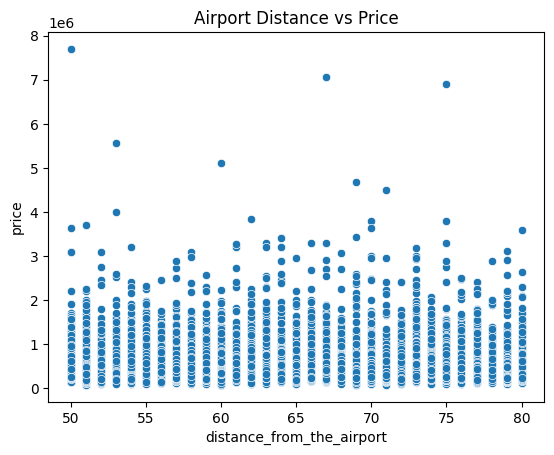

In [10]:
import matplotlib.pyplot as plt

sns.scatterplot(x=df["distance_from_the_airport"], y=df["price"])
plt.title("Airport Distance vs Price")
plt.show()


In [11]:
df["inv_distance"] = 1 / (df["distance_from_the_airport"] + 1)


In [14]:
df = df.drop(["distance_from_the_airport"],axis = 1)

In [15]:
df.head(5)

,id,date,number_of_bedrooms,number_of_bathrooms,living_area,lot_area,number_of_floors,waterfront_present,number_of_views,condition_of_the_house,...,built_year,renovation_year,postal_code,lattitude,longitude,living_area_renov,lot_area_renov,number_of_schools_nearby,price,inv_distance
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,2380000,0.016949
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,1400000,0.019231
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,1200000,0.018519
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,838000,0.012987
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,805000,0.019231


In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df = df.drop(['id'],axis = 1)
df.head(5)

,date,number_of_bedrooms,number_of_bathrooms,living_area,lot_area,number_of_floors,waterfront_present,number_of_views,condition_of_the_house,grade_of_the_house,...,built_year,renovation_year,postal_code,lattitude,longitude,living_area_renov,lot_area_renov,number_of_schools_nearby,price,inv_distance
0,42491,5,2.50,3650,9050,2.0,0,4,5,10,...,1921,0,122003,52.8645,-114.557,2880,5400,2,2380000,0.016949
1,42491,4,2.50,2920,4000,1.5,0,0,5,8,...,1909,0,122004,52.8878,-114.470,2470,4000,2,1400000,0.019231
2,42491,5,2.75,2910,9480,1.5,0,0,3,8,...,1939,0,122004,52.8852,-114.468,2940,6600,1,1200000,0.018519
3,42491,4,2.50,3310,42998,2.0,0,0,3,9,...,2001,0,122005,52.9532,-114.321,3350,42847,3,838000,0.012987
4,42491,3,2.00,2710,4500,1.5,0,0,4,8,...,1929,0,122006,52.9047,-114.485,2060,4500,1,805000,0.019231


In [19]:
df = df.drop(['date'],axis = 1)

In [20]:
df.head(5)

,number_of_bedrooms,number_of_bathrooms,living_area,lot_area,number_of_floors,waterfront_present,number_of_views,condition_of_the_house,grade_of_the_house,area_of_the_house(excluding_basement),...,built_year,renovation_year,postal_code,lattitude,longitude,living_area_renov,lot_area_renov,number_of_schools_nearby,price,inv_distance
0,5,2.50,3650,9050,2.0,0,4,5,10,3370,...,1921,0,122003,52.8645,-114.557,2880,5400,2,2380000,0.016949
1,4,2.50,2920,4000,1.5,0,0,5,8,1910,...,1909,0,122004,52.8878,-114.470,2470,4000,2,1400000,0.019231
2,5,2.75,2910,9480,1.5,0,0,3,8,2910,...,1939,0,122004,52.8852,-114.468,2940,6600,1,1200000,0.018519
3,4,2.50,3310,42998,2.0,0,0,3,9,3310,...,2001,0,122005,52.9532,-114.321,3350,42847,3,838000,0.012987
4,3,2.00,2710,4500,1.5,0,0,4,8,1880,...,1929,0,122006,52.9047,-114.485,2060,4500,1,805000,0.019231


In [21]:
df.dtypes


number_of_bedrooms                         int64
number_of_bathrooms                      float64
living_area                                int64
lot_area                                   int64
number_of_floors                         float64
waterfront_present                         int64
number_of_views                            int64
condition_of_the_house                     int64
grade_of_the_house                         int64
area_of_the_house(excluding_basement)      int64
area_of_the_basement                       int64
built_year                                 int64
renovation_year                            int64
postal_code                                int64
lattitude                                float64
longitude                                float64
living_area_renov                          int64
lot_area_renov                             int64
number_of_schools_nearby                   int64
price                                      int64
inv_distance        

In [22]:
X = df.drop("price", axis=1)
y = df["price"]

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   number_of_bedrooms                     14620 non-null  int64  
 1   number_of_bathrooms                    14620 non-null  float64
 2   living_area                            14620 non-null  int64  
 3   lot_area                               14620 non-null  int64  
 4   number_of_floors                       14620 non-null  float64
 5   waterfront_present                     14620 non-null  int64  
 6   number_of_views                        14620 non-null  int64  
 7   condition_of_the_house                 14620 non-null  int64  
 8   grade_of_the_house                     14620 non-null  int64  
 9   area_of_the_house(excluding_basement)  14620 non-null  int64  
 10  area_of_the_basement                   14620 non-null  int64  
 11  bu

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [27]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [28]:
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 17145699328.00


In [29]:
print(f"R2 Score: {r2:.4f}")

R2 Score: 0.8783


In [30]:
X.columns

Index(['number_of_bedrooms', 'number_of_bathrooms', 'living_area', 'lot_area',
       'number_of_floors', 'waterfront_present', 'number_of_views',
       'condition_of_the_house', 'grade_of_the_house',
       'area_of_the_house(excluding_basement)', 'area_of_the_basement',
       'built_year', 'renovation_year', 'postal_code', 'lattitude',
       'longitude', 'living_area_renov', 'lot_area_renov',
       'number_of_schools_nearby', 'inv_distance'],
      dtype='object')

In [31]:
joblib.dump(model, "model.pkl")
joblib.dump(list(X.columns), "columns.pkl")

['columns.pkl']